In [1]:
# Import MNIST data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

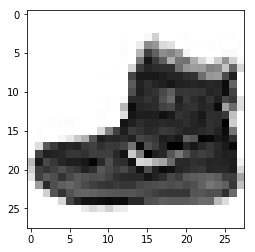

In [4]:
plt.figure()
plt.imshow(train_images[0], cmap='Greys')

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

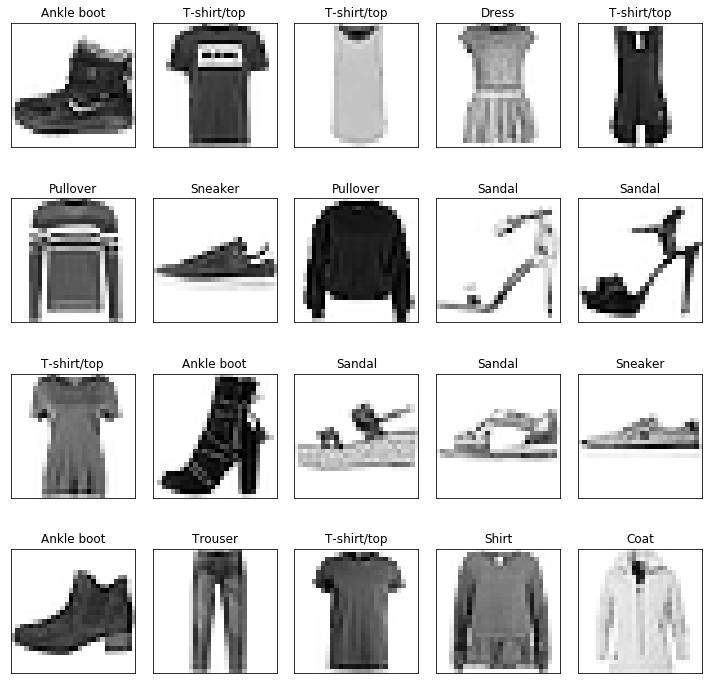

In [5]:
fig = plt.figure(figsize=(10,10))

for i in range(20):    
    subplot = fig.add_subplot(4, 5, i + 1)
    
    subplot.set_xticks([])
    subplot.set_yticks([])

    subplot.set_title(class_names[train_labels[i]])
    subplot.imshow(train_images[i].reshape(28,28), cmap='Greys')

plt.tight_layout()
plt.show()



In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
train_images = train_images.reshape([-1,784])
test_images = test_images.reshape([-1,784])

In [8]:
num_classes =10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None])

n_hidden_1 = 256
n_hidden_2 = 256
n_hidden_3 = 128

In [9]:
layer_1 = tf.layers.dense(X, n_hidden_1, activation=tf.nn.relu)
layer_2 = tf.layers.dense(layer_1, n_hidden_2, activation=tf.nn.relu)
layer_3 = tf.layers.dense(layer_2, n_hidden_3, activation=tf.nn.relu)
out_layer = tf.layers.dense(layer_3, num_classes)

In [10]:
# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
Y_onehot = tf.one_hot(tf.cast(Y, tf.int32), 10, 1, 0)
loss = tf.losses.sigmoid_cross_entropy(multi_class_labels=Y_onehot, logits=out_layer)
optimizer = tf.train.AdamOptimizer(0.01).minimize(loss)

In [11]:
# 
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [12]:
batch_size = 128
total_batch = int(len(train_images)/batch_size)

for epoch in range(10):
    total_loss = 0
    for i in range(total_batch):            
#         batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = train_images[i:i+batch_size, :]
        batch_ys = train_labels[i:i+batch_size]
        _, loss_val = sess.run([optimizer, loss], feed_dict={X: batch_xs, Y: batch_ys})
        total_loss += loss_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. loss =', '{:.4f}'.format(total_loss / total_batch))

Epoch: 0001 Avg. loss = 0.0254
Epoch: 0002 Avg. loss = 0.0060
Epoch: 0003 Avg. loss = 0.0061
Epoch: 0004 Avg. loss = 0.0035
Epoch: 0005 Avg. loss = 0.0027
Epoch: 0006 Avg. loss = 0.0038
Epoch: 0007 Avg. loss = 0.0053
Epoch: 0008 Avg. loss = 0.0042
Epoch: 0009 Avg. loss = 0.0027
Epoch: 0010 Avg. loss = 0.0026


In [13]:
is_correct = tf.equal(tf.argmax(out_layer, 1), tf.argmax(Y_onehot, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('Accuracy:', sess.run(accuracy,
                        feed_dict={X: test_images,
                                   Y: test_labels}))

Accuracy: 0.7549
